In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ACC=pd.read_csv('../sequence_xc9500_coh9500/stress_drop.ACC.dat',delim_whitespace=True)
VEL=pd.read_csv('../sequence_xc9500_coh9500/stress_drop.VEL.dat',delim_whitespace=True)
DISP=pd.read_csv('../sequence_xc9500_coh9500/stress_drop.DISP.dat',delim_whitespace=True)
ACC.head()
DISP.tail()
Nseq = 476

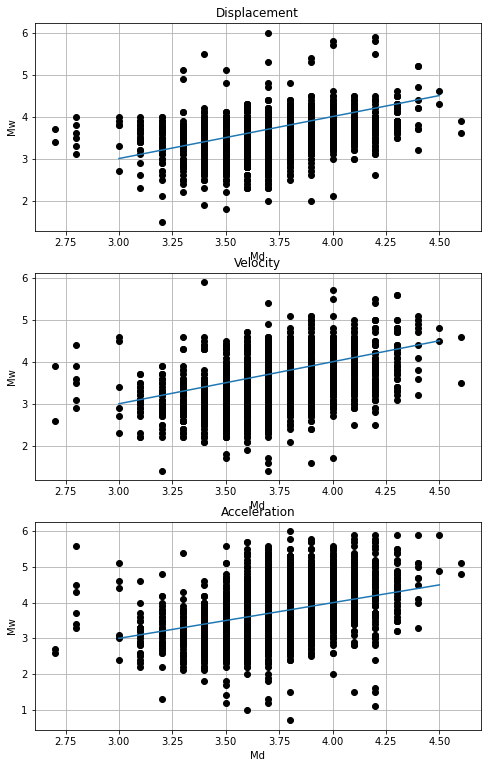

In [4]:
fig, ax = plt.subplots(3,1, figsize = (8,13))
ax[0].plot(DISP['mag'], DISP['Mw']+1,'ko')
ax[0].plot([3.0, 4.5], [3.0, 4.5])
ax[0].set_xlabel('Md')
ax[0].set_ylabel('Mw')
ax[0].set_title('Displacement')
ax[0].grid()
ax[1].plot(VEL['mag'], VEL['Mw']+1,'ko')
ax[1].plot([3.0, 4.5], [3.0, 4.5])
ax[1].set_xlabel('Md')
ax[1].set_ylabel('Mw')
ax[1].set_title('Velocity')
ax[1].grid()
ax[2].plot(ACC['mag'], ACC['Mw']+1,'ko')
ax[2].plot([3.0, 4.5], [3.0, 4.5])
ax[2].set_xlabel('Md')
ax[2].set_ylabel('Mw')
ax[2].set_title('Acceleration')
ax[2].grid()

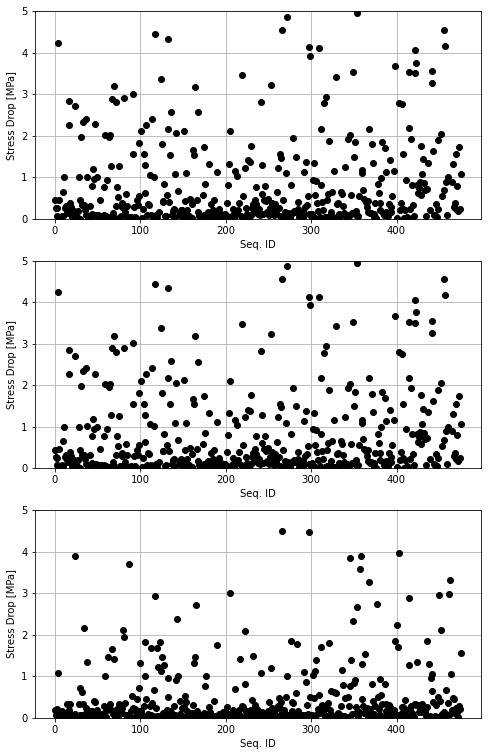

In [6]:
StressDropD = np.zeros((Nseq,1))
for idn in range(1,Nseq+1):
    StressDropD[idn -1] = DISP.loc[DISP['ID']==idn]['StressDrop'].mean()
    
StressDropV = np.zeros((Nseq,1))
for idn in range(1,Nseq+1):
    StressDropV[idn -1] = DISP.loc[VEL['ID']==idn]['StressDrop'].mean()
    
StressDropA = np.zeros((Nseq,1))
for idn in range(1,Nseq+1):
    StressDropA[idn -1] = ACC.loc[ACC['ID']==idn]['StressDrop'].mean()
    
fig, ax = plt.subplots(3,1, figsize = (8,13))
ax[0].plot(StressDropD*1,'ko')
ax[0].set_ylim([0, 5])
ax[0].set_xlabel('Seq. ID')
ax[0].set_ylabel('Stress Drop [MPa]')
ax[0].grid()

ax[1].plot(StressDropV*1,'ko')
ax[1].set_ylim([0, 5])
ax[1].set_xlabel('Seq. ID')
ax[1].set_ylabel('Stress Drop [MPa]')
ax[1].grid()

ax[2].plot(StressDropA*1,'ko')
ax[2].set_ylim([0, 5])
ax[2].set_xlabel('Seq. ID')
ax[2].set_ylabel('Stress Drop [MPa]')
ax[2].grid()

#np.savetxt('stressDropDisp.dat', StressDropD, delimiter='\n', fmt='%5.3f')
#np.savetxt('stressDropVel.dat',  StressDropV, delimiter='\n', fmt='%5.3f')
#np.savetxt('stressDropAcc.dat',  StressDropA, delimiter='\n', fmt='%5.3f')